In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from pylab import rcParams

In [4]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

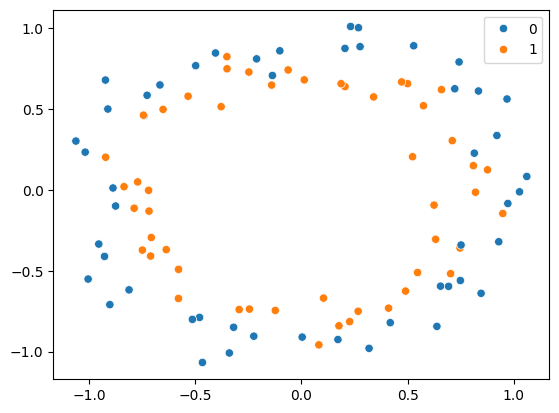

In [7]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,verbose=0)

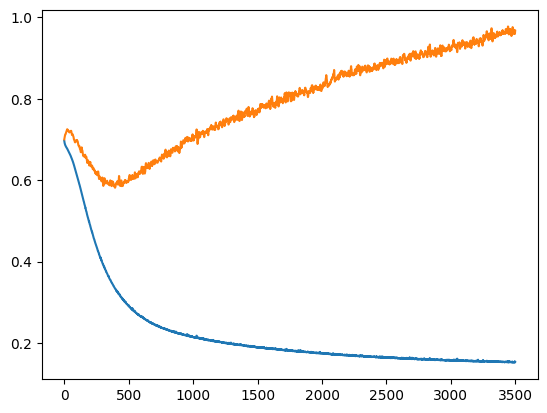

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [14]:
'''the model shows the overfitting after the 350 or 400 epochs
the early stopping could help here.'''

'the model shows the overfitting after the 350 or 400 epochs\nthe early stopping could help here.'

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 365us/step


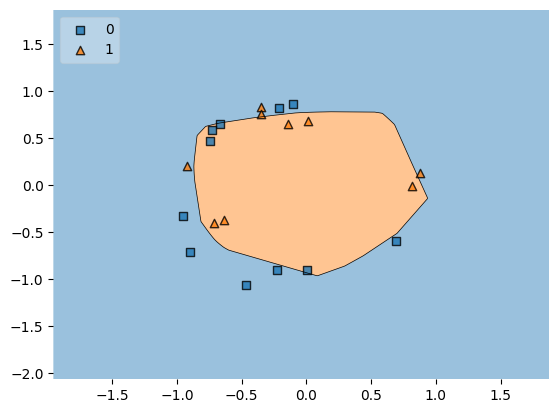

In [15]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

### **EARLY STOPPING**

In [24]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [30]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,verbose=1,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5625 - loss: 0.6767 - val_accuracy: 0.4000 - val_loss: 0.7286
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5625 - loss: 0.6762 - val_accuracy: 0.4000 - val_loss: 0.7275
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5625 - loss: 0.6758 - val_accuracy: 0.4000 - val_loss: 0.7268
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5625 - loss: 0.6750 - val_accuracy: 0.4000 - val_loss: 0.7259
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5625 - loss: 0.6744 - val_accuracy: 0.3500 - val_loss: 0.7241
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5625 - loss: 0.6737 - val_accuracy: 0.3500 - val_loss: 0.7230
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5625 - loss: 0.6732 - val_accuracy: 0.3500 - val_loss: 0.7228
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5625 - loss: 0.6727 - val_accuracy: 0.3500 - v

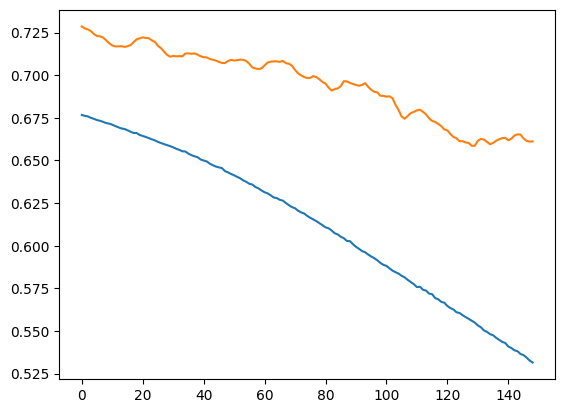

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 366us/step


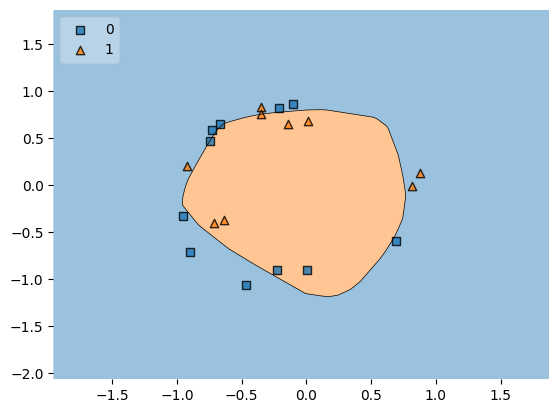

In [32]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

**Earlystopping class**
- monitor: which quantity to be monitored
- min_delta: minimum change in the monitored quantity to be considered improvement
- patience: number of epochs with no improvement after which training will be improved
- verbose: detail of the training
- mode: [auto,min,max] : in min mode training will stop when the quanitity monitored has stopped decreasing. in max mode training will stop when the qunatity monitored has stopped increasing. in auto, the direction in automaticallt inferred from the name of the monitored quantity
- baseline: traning will stop if the model doesnot show the imporvement over the base line
- restore_best_weights: resotre the epochs with the minimum loss.